<a href="https://colab.research.google.com/github/victoraccete/us-accidents/blob/main/RQ2_Visib_e_Cond_Climaticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install kaggle

In [2]:
#@title Upload yout API token. 
#@markdown Check [here](https://github.com/Kaggle/kaggle-api#:~:text=API%20credentials,file%20containing%20your%20API%20credentials.) to see how to get it.
# importing kaggle.json to use the api 
from google.colab import files
files.upload()
; # suppressing output to hide API informations

Saving kaggle.json to kaggle.json


'# suppressing output to hide API informations'

In [3]:
#@title Download dataset from Kaggle.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
;
!kaggle datasets download -d sobhanmoosavi/us-accidents

100% 289M/290M [00:10<00:00, 30.2MB/s]
100% 290M/290M [00:10<00:00, 28.0MB/s]


In [4]:
#@title Unzipping
# zip extraction cell
import zipfile
zip_ref = zipfile.ZipFile('us-accidents.zip', 'r')
zip_ref.extractall('../content')
zip_ref.close()

## Done

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

accidents = pd.read_csv('US_Accidents_Dec20_Updated.csv')
accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
accidents['Visibility(mi)'].value_counts().head(10)

10.0    2260327
7.0       87566
9.0       75270
8.0       60090
5.0       56646
6.0       51126
4.0       45793
3.0       44457
2.0       40205
1.0       29211
Name: Visibility(mi), dtype: int64

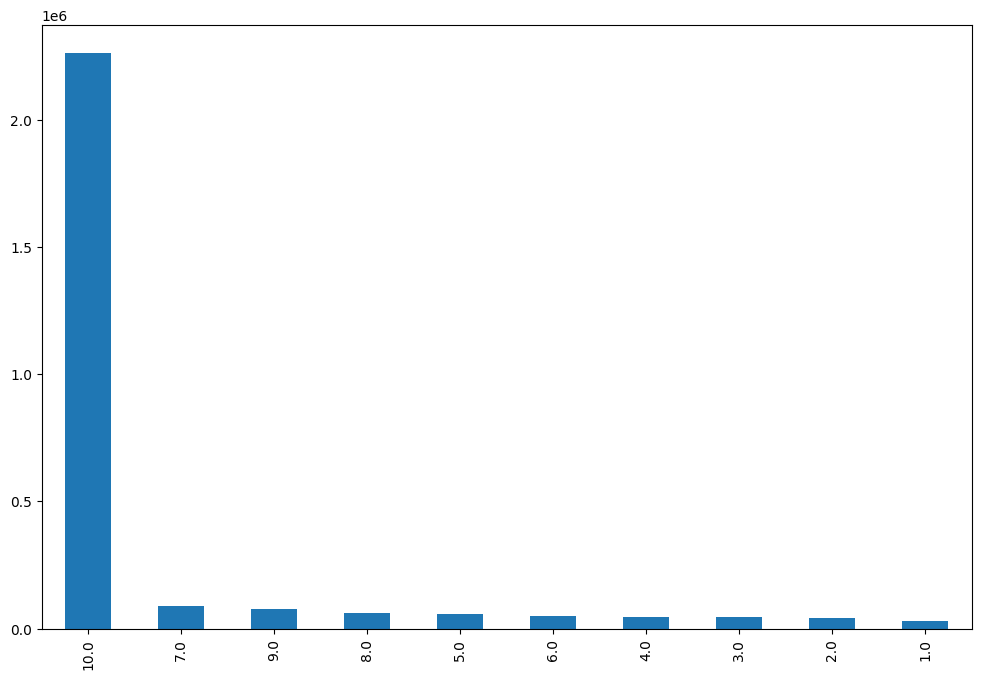

In [8]:
# Visualizando as visibilidades mais comuns
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

accidents['Visibility(mi)'].value_counts().head(10).plot(kind='bar')

In [9]:
accidents['Weather_Condition'].value_counts().head(10)

Fair                692680
Clear               498925
Mostly Cloudy       386122
Partly Cloudy       268851
Cloudy              245054
Overcast            237068
Light Rain          140946
Scattered Clouds    127090
Light Snow           39941
Fog                  33424
Name: Weather_Condition, dtype: int64

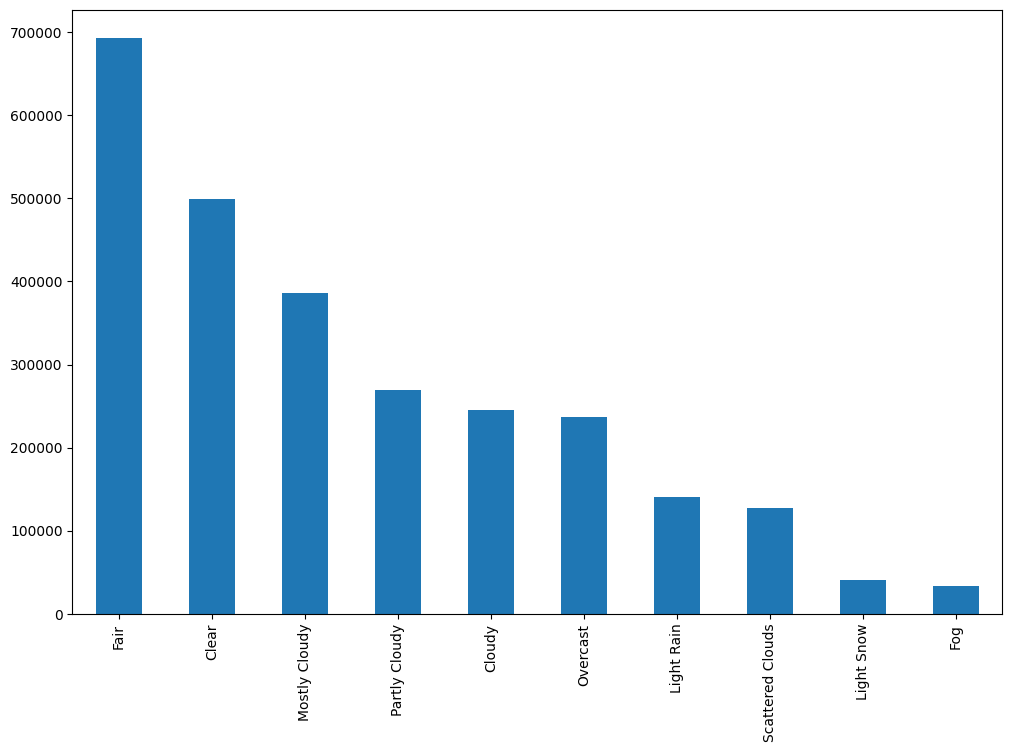

In [10]:
# Visualizando as condições climáticas mais comuns 
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

accidents['Weather_Condition'].value_counts()[:10].plot(kind='bar')

In [11]:
# Separando o dataset por severidade
accidents_sev = []

for i in range(1,5): 
  accidents_sev.append( accidents[ accidents['Severity'] == i ] )  

In [12]:
for i in range(0,4):
  print("# Severity ", i+1)
  print("Number of occurencies: ", accidents_sev[i].shape[0], "\n")

# Severity  1
Number of occurencies:  28751 

# Severity  2
Number of occurencies:  2129263 

# Severity  3
Number of occurencies:  629452 

# Severity  4
Number of occurencies:  119144 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


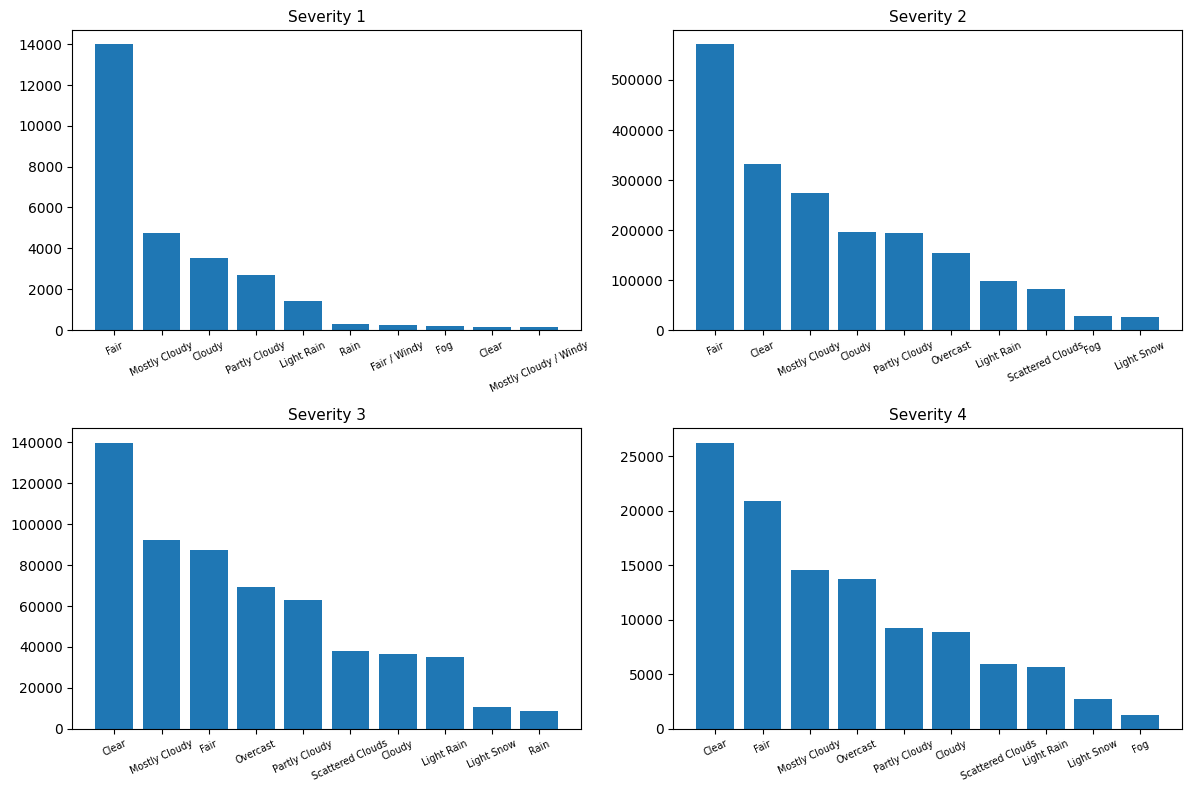

In [13]:
# Plotando as condições climáticas mais comuns por severidade
 
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')


for i in range(0,4):
  # set titles
  ax = fig.add_subplot(221+i)
  ax.set_title('Severity '+str(i+1), fontsize=11)

  # plot bars
  weather = accidents_sev[i]['Weather_Condition'].value_counts()[:10]
  plt.subplot(221+i), plt.bar(weather.index, weather.values)
  plt.xticks(rotation=25, size='x-small')

fig.tight_layout(pad=1.0)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


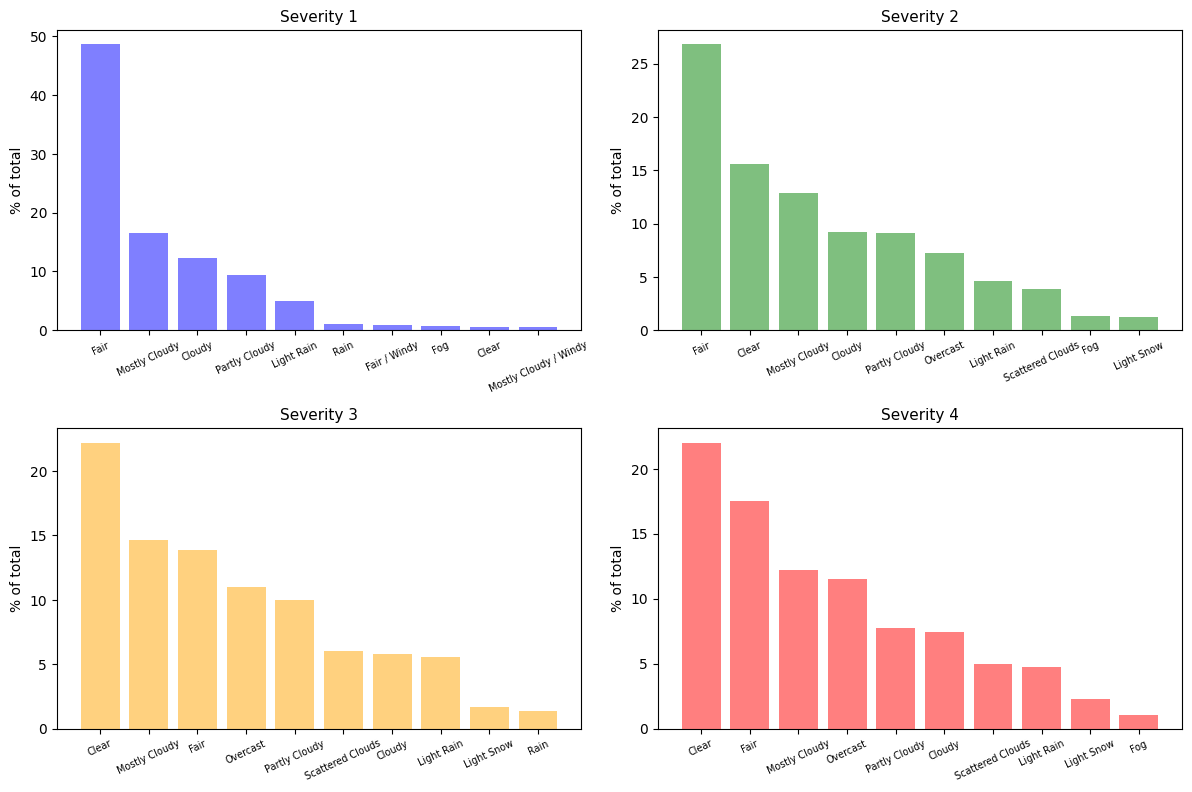

In [14]:
# Plotando novamente, mas proporcional
 
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

colours = ['blue', 'green', 'orange', 'red']

for i in range(0,4):
  # set titles
  ax = fig.add_subplot(221+i)
  ax.set_title('Severity '+str(i+1), fontsize=11)

  # plot bars
  weather = accidents_sev[i]['Weather_Condition'].value_counts()[:10]
  plt.subplot(221+i), plt.bar(weather.index, (weather.values/accidents_sev[i]['Weather_Condition'].size)*100, color=colours[i], alpha=0.5)
  plt.xticks(rotation=25, size='x-small')
  plt.ylabel("% of total")

fig.tight_layout(pad=1.0)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


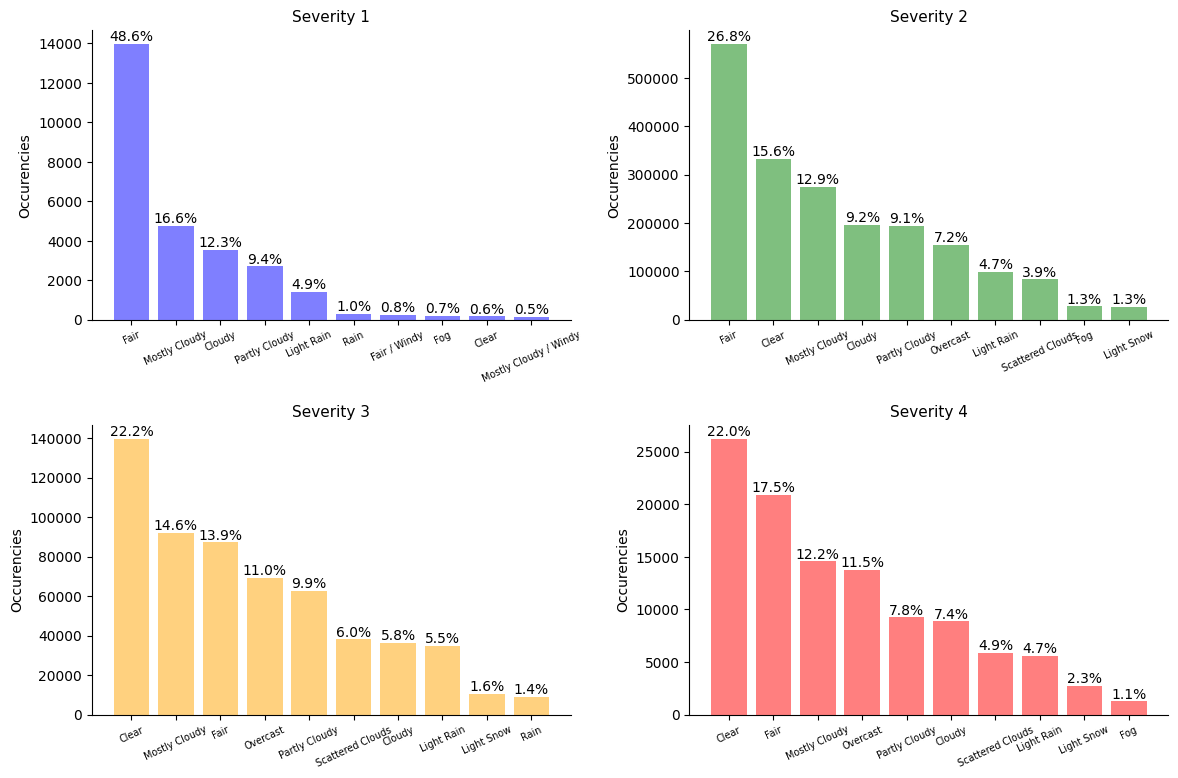

In [15]:
# Plotando novamente, mas com o design aprimorado
import numpy as np

fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
#fig.suptitle("Most common weather per accident severity", y=1.05, size=18)

colours = ['blue', 'green', 'orange', 'red']

for i in range(0,4):
  # set titles
  ax = fig.add_subplot(221+i)
  ax.set_title('Severity '+str(i+1), fontsize=11)

  # Hide the right and top spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # plot bars
  weather = accidents_sev[i]['Weather_Condition'].value_counts()[:10]
  plt.subplot(221+i)
  bar = plt.bar(weather.index, weather.values, color=colours[i], alpha=0.5)

  # write percentages over the bars
  total = accidents_sev[i]['Weather_Condition'].size
  for rect in bar:
    height = rect.get_height()
    percentage = np.round((height/total)*100, 1)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, str(percentage)+'%', ha='center', va='bottom')

  plt.xticks(rotation=25, size='x-small')
  plt.ylabel("Occurencies")
  
fig.tight_layout(pad=1.5)
plt.show()

In [16]:
# Listando as diferentes condições climáticas do dataset
accidents['Weather_Condition'].unique()

array(['Fair', 'Cloudy', 'Clear', 'Overcast', 'Light Snow',
       'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds', 'Wintry Mix',
       'Shallow Fog', 'Fog', 'Haze', nan, 'Light Rain', 'Smoke', 'Rain',
       'Cloudy / Windy', 'Light Drizzle', 'Heavy Snow', 'Snow',
       'Thunderstorm', 'Light Rain Shower', 'Heavy Rain', 'Mist',
       'Thunderstorms and Rain', 'Fair / Windy', 'Light Freezing Rain',
       'Light Thunderstorms and Rain', 'Light Snow / Windy',
       'Thunder in the Vicinity', 'Drizzle', 'Rain / Windy', 'Thunder',
       'Drizzle and Fog', 'Heavy Thunderstorms and Rain', 'T-Storm',
       'Light Rain with Thunder', 'Partly Cloudy / Windy',
       'Patches of Fog', 'Mostly Cloudy / Windy', 'Haze / Windy',
       'Heavy T-Storm', 'Light Rain / Windy', 'Blowing Snow',
       'Light Freezing Fog', 'Light Freezing Drizzle', 'Small Hail',
       'Widespread Dust', 'Heavy Drizzle', 'Heavy Rain / Windy',
       'Heavy T-Storm / Windy', 'Snow / Windy', 'Light Blowing Snow

In [17]:
# Quantidade de condições climáticas diferentes
len(accidents['Weather_Condition'].unique())

129

In [18]:
fair = accidents[ accidents['Weather_Condition'].str.contains('Clear', na=False, regex=False) | accidents['Weather_Condition'].str.contains('Fair', na=False, regex=False) ]

cloudy = accidents[ accidents['Weather_Condition'].str.contains('Cloud', na=False, regex=False) | accidents['Weather_Condition'].str.contains('Overcast', na=False, regex=False) ]

fog = accidents[ accidents['Weather_Condition'].str.contains('Fog', na=False, regex=False) | accidents['Weather_Condition'].str.contains('Haze', na=False, regex=False) ]

rainy = accidents[ accidents['Weather_Condition'].str.contains('Rain', na=False, regex=False) ]

snow = accidents[ accidents['Weather_Condition'].str.contains('Snow', na=False, regex=False) | accidents['Weather_Condition'].str.contains('Ice', na=False, regex=False) ]

thunder = accidents[ accidents['Weather_Condition'].str.contains('Thunder', na=False, regex=False) ]

# Dictionary with the new weathers
conditions = {'Fair / Clear':fair, 'Cloudy / Overcast':cloudy, 'Foggy / Hazy':fog, 'Rainy':rainy, 'Snowy':snow, 'Thunderstorm':thunder}

In [19]:
for key in conditions.keys():
  print("# ", key)
  print("Number of occurencies: ", str(conditions[key].shape[0]), "\n")

#  Fair / Clear
Number of occurencies:  1200726 

#  Cloudy / Overcast
Number of occurencies:  1277123 

#  Foggy / Hazy
Number of occurencies:  70699 

#  Rainy
Number of occurencies:  200939 

#  Snowy
Number of occurencies:  48299 

#  Thunderstorm
Number of occurencies:  16660 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


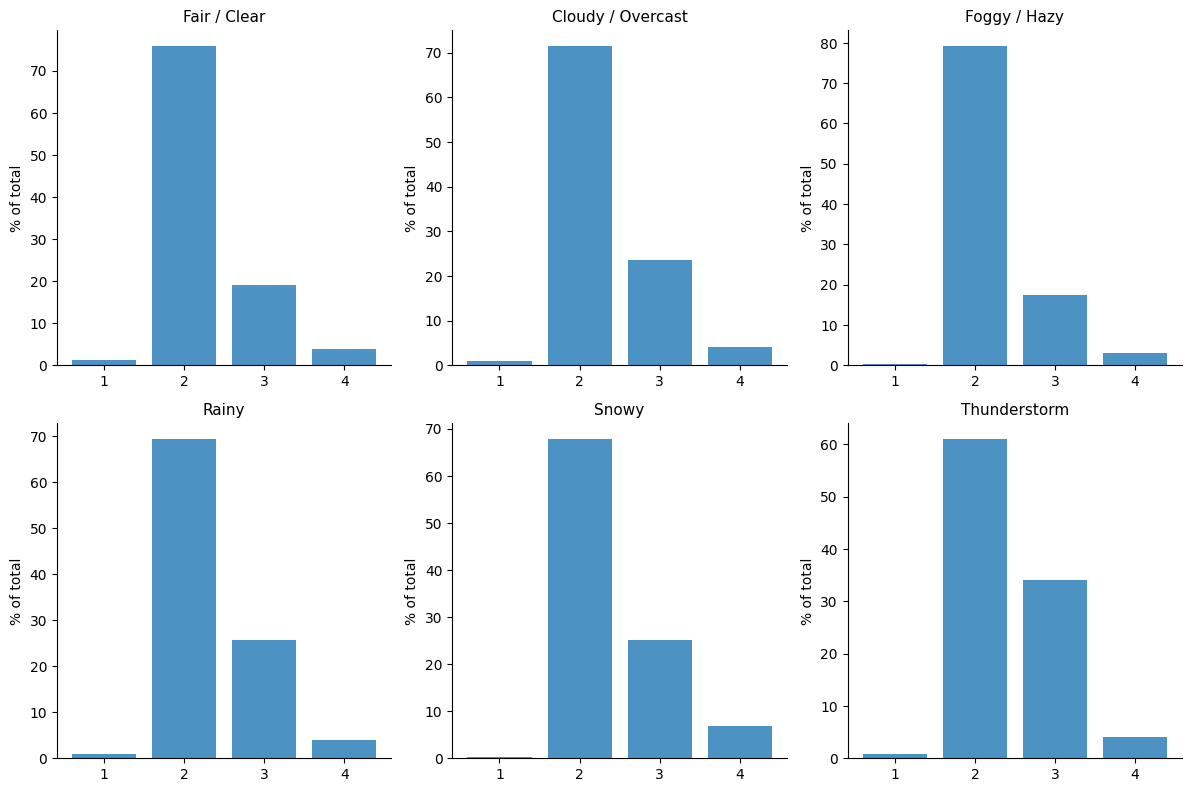

In [20]:
# Plotando a proporção de cada severidade em relação à quantidade total de casos
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

colours = ['blue', 'green', 'orange', 'red']


for i, key in enumerate(conditions):
  # set titles
  ax = fig.add_subplot(231+i)
  ax.set_title(key, fontsize=11)

  # Hide the right and top spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # plot bars
  severity = conditions[key]['Severity']
  plt.subplot(231+i), plt.bar(severity.value_counts().sort_index().keys(), (severity.value_counts().sort_index()/severity.shape[0])*100, alpha=0.8)
  plt.ylabel("% of total")


fig.tight_layout(pad=1.0)
plt.show()

In [21]:
total_per_severity = []
for sev in severity.value_counts().sort_index().keys():
  total_per_severity.append(accidents[ accidents['Severity'] == sev ].shape[0])

total_per_severity

[28751, 2129263, 629452, 119144]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

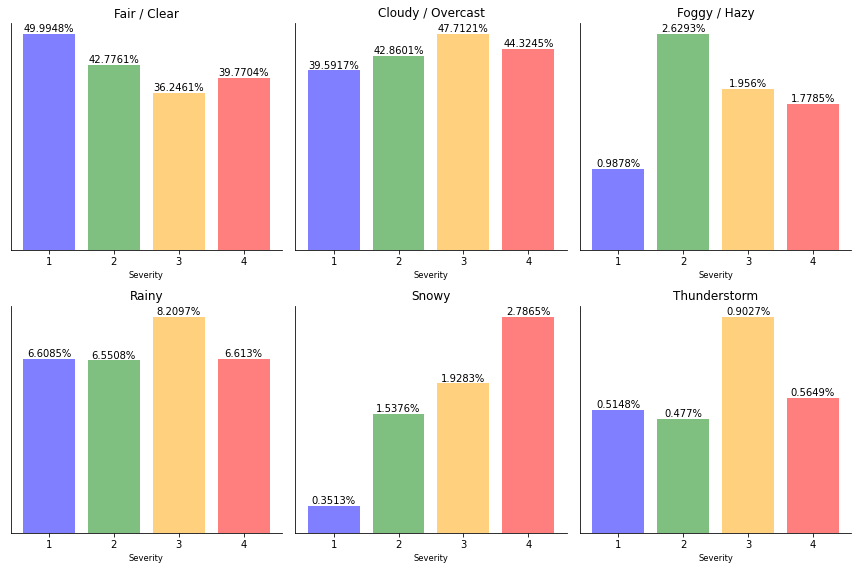

In [22]:
# Como o dataset é desbalanceado, os acidentes de severidade 2 sempre possuem mais ocorrências; 
# Vamos melhorar e calcular a proporção de acidentes em relação ao total de acidentes daquela severidade

fig = plt.figure(figsize=(12,8), facecolor='w', edgecolor='k')
#fig.suptitle("Proportional occurencies per weather condition", y=1.1, size=18)

colours = ['blue', 'green', 'orange', 'red']


for i, key in enumerate(conditions):
  # Set titles
  ax = fig.add_subplot(231+i)
  ax.set_title(key, fontsize=12)

  # Hide the right and top spines
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  
  # Get only the severity column for the desired weather
  severity = conditions[key]['Severity']

  # Total of incidents per severity (to calculate the proportion for each weather)
  total_per_severity = []
  for sev in severity.value_counts().sort_index().keys():
    total_per_severity.append(accidents[ accidents['Severity'] == sev ].shape[0])

  labels = severity.value_counts().sort_index().keys()
  values = (severity.value_counts().sort_index()/total_per_severity)*100

  # plot bars
  plt.subplot(231+i)
  bar = plt.bar(labels, values, color=colours, alpha=0.5)
  #plt.ylabel("% of total")
  plt.xlabel('Severity', fontsize='small')
  
  # write percentages over the bars
  total = severity.size
  for rect in bar:
    height = rect.get_height()
    percentage = np.round(height, 4)
    plt.text(rect.get_x() + rect.get_width()/2.0, height, str(percentage)+'%', ha='center', va='bottom')

  # adjust plot
  ax.get_yaxis().set_visible(False)
  plt.xticks(severity.value_counts().keys())


fig.tight_layout(pad=1.0)
plt.show()